### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
cleaned_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/cleaned_df.csv')

In [3]:
#Creating GeoDataFrame for Start Station
gdf_start = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['start_lng'], cleaned_df['start_lat']), crs="EPSG:4326")

In [4]:
#Creating GeoDataFrame for End Station
gdf_end = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['end_lng'], cleaned_df['end_lat']), crs="EPSG:4326")

In [5]:
#Reading shape file for NJ boundary
nj_map = gpd.read_file('/Users/drushti/Documents/PythonProject/CitiBike/nj.geojson')

In [6]:
#EXTRACTING ZIPCODE AND GEOMETRY POINTS IN SEPERATE DATAFRAME
# ZCTA and zipcodede = https://help.healthycities.org/hc/en-us/articles/115006016767-What-is-the-difference-between-ZIP-Codes-and-ZCTAs-#:~:text=ZCTAs%20or%20ZIP%20Code%20Tabulation,same%20as%20its%20ZIP%20Code.
nj_map = nj_map[['ZCTA5CE10','geometry']]
nj_map.rename(columns={'ZCTA5CE10':'zipcode'},inplace=True)

#### EXTRACTING HUDSON COUNTY ZIPCODE FROM NJ BOUNDARY GEOJSON FILE

In [7]:
#### EXTRACTING ONLY ZIPCODE IN DATASET FROM NJ BOUNDARY FILE 
hudson_county = ['07302', '07030', '07307', '07306', '07310', '07304', '07311',
       '07305', '07032']
new_map = nj_map[nj_map['zipcode'].isin(hudson_county)]

#### SPATIAL JOIN - START STATION ZIPCODE

In [8]:
#Spatial Join on Geodataframe - https://geopandas.org/en/stable/gallery/spatial_joins.html

In [9]:
#PERFORMING SPATIAL JOINM TO MATCH START STATION ID WITH RESPECTIVE ZIPCODE
trip_start = gdf_start.sjoin(nj_map,how='left')

In [10]:
zip_null = trip_start[trip_start['zipcode'].isna()]
print(zip_null.shape)
zip_null['start_station_id'].value_counts()

(76, 22)


start_station_id
JC002      31
JC106       6
JC098       2
HB303       2
HB102       2
4824.03     1
7059.01     1
5922.04     1
5500.07     1
HB101       1
JC104       1
HB404       1
7123.04     1
6224.05     1
HB402       1
HB103       1
6889.12     1
HB607       1
5329.08     1
8262.07     1
8226.06     1
4617.01     1
5820.08     1
6659.09     1
5626.13     1
6560.15     1
8254.01     1
5065.14     1
4850.04     1
5616.01     1
6948.10     1
6747.07     1
6779.05     1
5065.04     1
5905.14     1
6756.05     1
5436.09     1
JC116       1
Name: count, dtype: int64

In [11]:
#### dropping rows with missing zipcode
ts_cleaned = trip_start.copy()
ts_cleaned.dropna(axis=0,inplace=True)
ts_cleaned.shape

(945267, 22)

#### SPATIAL JOIN - END STATION ZIPCODE

In [12]:
#PERFORMING SPATIAL JOIN TO MATCH END STATION ID WITH RESPECTIVE ZIPCODE
trip_end = gdf_end.sjoin(nj_map, how='left')
trip_end.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760),414.0,07302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598),549.0,07030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,member,Sunday,Sunday,13,13,August,10.13,POINT (-74.05099 40.71942),414.0,07302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,member,Thursday,Thursday,22,22,August,19.32,POINT (-74.05179 40.74268),491.0,07307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,member,Monday,Monday,14,14,August,13.38,POINT (-74.07196 40.72573),330.0,07306


In [13]:
end_zipnull = trip_end[trip_end['zipcode'].isnull()]
print(end_zipnull.shape)
end_zipnull['end_station_id'].value_counts()

(1401, 22)


end_station_id
5297.02    95
5470.10    61
5561.06    49
5065.10    45
5470.12    36
           ..
4060.09     1
5752.09     1
4243.01     1
6644.08     1
5128.04     1
Name: count, Length: 331, dtype: int64

In [14]:
#### dropping rows with missing zipcode
te_cleaned = trip_end.copy()
te_cleaned.dropna(axis=0,inplace=True)
te_cleaned.shape

(943942, 22)

In [15]:
#Renaming zipcode as start and end
te_cleaned.rename(columns={'zipcode':'zip_end'}, inplace = True)
ts_cleaned.rename(columns={'zipcode':'zip_start'}, inplace = True)

#### COMBINING START AND END GEODATAFRAME

In [16]:
#Combing start and end geodataframe and checking for missing zipcode
geo_df = ts_cleaned
geo_df['zip_end'] = te_cleaned['zip_end']
geo_df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
startweekday             0
endweekday               0
starttime                0
endtime                  0
month                    0
tripduration             0
geometry                 0
index_right              0
zip_start                0
zip_end               1372
dtype: int64

In [17]:
#dropping rows with missing zipcodes for end stations
geo_df.dropna(axis=0,inplace=True)
geo_df.shape

(943895, 23)

In [18]:
### Trips Start and End in same zipcode
all_same = geo_df[geo_df['zip_start'] == geo_df['zip_end']]

In [19]:
### Trips Start and End in Different zipcode
all_diff = geo_df[geo_df['zip_start'] != geo_df['zip_end']]

#### FREQUENT TRIPS WITHIN SAME ZIPCODE

In [20]:
same_zip = all_same.groupby(['zip_start','zip_end'],as_index=False).agg(trip_count = ('ride_id','count')).sort_values(by ='trip_count',ascending=False)
same_zip.sort_values(by='trip_count',ascending=False,inplace=True)
same_zip

,zip_start,zip_end,trip_count
0,07030,07030,362075
2,07302,07302,201333
5,07306,07306,36475
7,07310,07310,14847
3,07304,07304,6516
6,07307,07307,3921
4,07305,07305,810
8,07311,07311,221
1,07032,07032,1


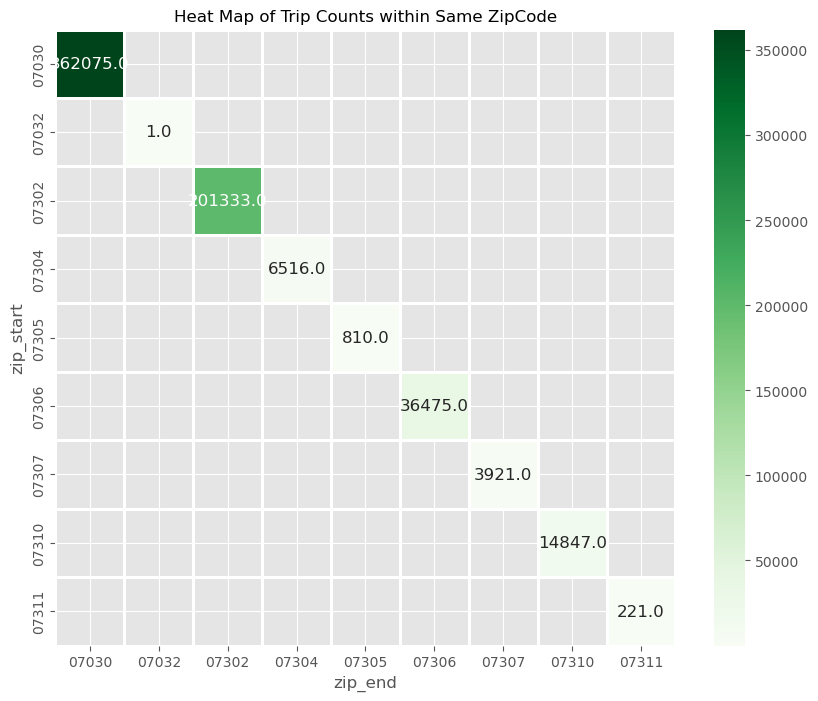

In [21]:
import seaborn as sns
import matplotlib.ticker as ticker

same_zip = same_zip.pivot(index= ['zip_start'],columns=['zip_end'],values='trip_count')
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}')

# Use seaborn to create the heat map
plt.figure(figsize=(10,8))
sns.heatmap(same_zip,cmap="Greens",linewidths=.5,annot=True,linewidth=2,annot_kws={"size": 12}, fmt='',cbar_kws={'format': formatter})

plt.title('Heat Map of Trip Counts within Same ZipCode',fontsize=12,)
plt.show()

In [22]:
## Tree Map

In [23]:
same_zip = all_same.groupby(['zip_start','zip_end'],as_index=False).agg(trip_count = ('ride_id','count')).sort_values(by ='trip_count',ascending=False)
same_zip.sort_values(by='trip_count',ascending=False,inplace=True)
same_zip

,zip_start,zip_end,trip_count
0,07030,07030,362075
2,07302,07302,201333
5,07306,07306,36475
7,07310,07310,14847
3,07304,07304,6516
6,07307,07307,3921
4,07305,07305,810
8,07311,07311,221
1,07032,07032,1


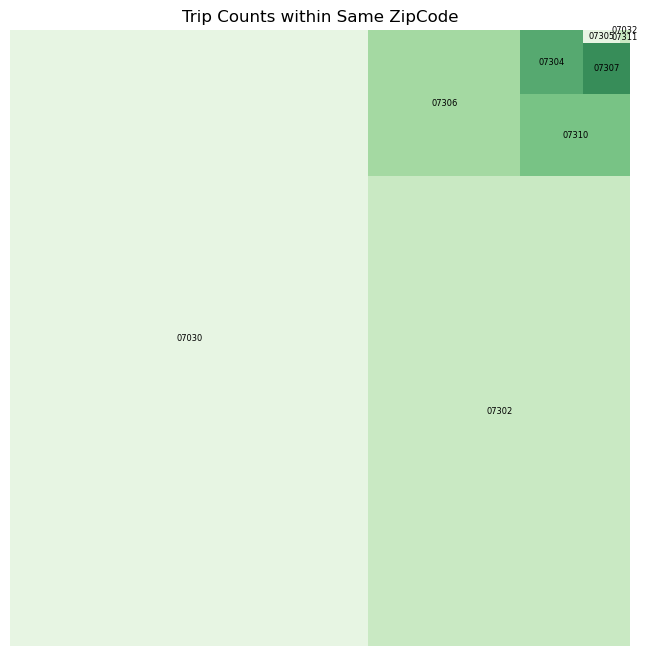

In [24]:
#library for creating tree map
import squarify
import seaborn as sns

#size of the plot
plt.figure(figsize = (8,8))

# Plot the treemap
squarify.plot(sizes = same_zip['trip_count'],label = same_zip['zip_start'], alpha = 0.8, text_kwargs = {'fontsize':6},color=sns.color_palette("Greens"))


#remove labels on x and y axis
plt.axis('off')
plt.title('Trip Counts within Same ZipCode',fontsize=12,)

#display graph
plt.show();

#### FREQUENT TRIPS WITHIN DIFFERENT ZIPCODE

In [25]:
diff_zip = all_diff.groupby(['zip_start','zip_end'],as_index=False).agg(trip_count = ('ride_id','count')).sort_values(by ='trip_count',ascending=False)
#diff_zip['trip_count'] = np.round(diff_zip['trip_count']/365,0)
diff_zip

,zip_start,zip_end,trip_count
43,07310,07302,29676
12,07302,07310,29269
42,07310,07030,25166
5,07030,07310,24949
0,07030,07302,24084
7,07302,07030,23506
15,07304,07302,20714
8,07302,07304,20656
29,07306,07302,16805
10,07302,07306,12641


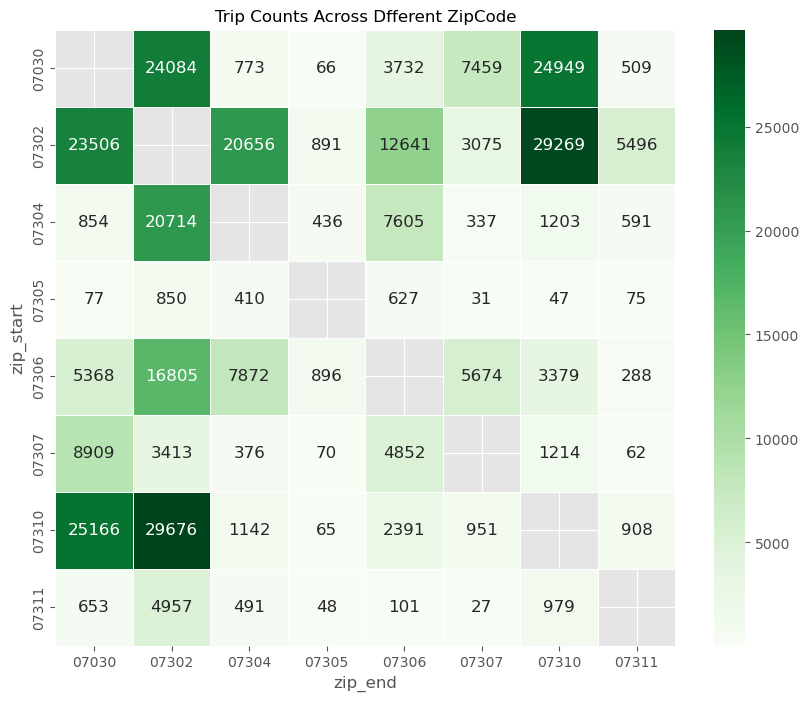

In [26]:
import matplotlib.ticker as ticker
import seaborn as sns
#diff_zip = diff_zip.astype(float).fillna(0)

diff_zip = diff_zip.pivot(index= ['zip_start'],columns=['zip_end'],values='trip_count')

#First, handle NaN and infinite values
diff_zip = diff_zip.fillna(0).replace([np.inf, -np.inf], 0)
 #Now convert to integers
diff_zip = diff_zip.astype(int)

 #Create a mask for the upper triangle
#mask = np.triu(np.ones_like(diff_zip, dtype=bool))

mask = np.zeros_like(diff_zip, dtype=bool)
np.fill_diagonal(mask, True)

plt.figure(figsize=(10, 8))
#diff_zip = diff_zip.astype(int)

#diff_zip = diff_zip.fillna(0).replace([np.inf, -np.inf], 0).astype(int)

#mask = np.triu(np.ones_like(diff_zip, dtype=bool))
#formatter = ticker.FuncFormatter(lambda x, pos: f'{x:g}')

formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}')


#Use seaborn to create the heat map
#sns.heatmap(diff_zip,cmap="YlGnBu",linewidths=.5,annot=True,linewidth=2,mask=mask)
sns.heatmap(diff_zip, cmap="Greens", linewidths=.5, annot=True, annot_kws={"size": 12},  fmt='', mask=mask, cbar_kws={'format': formatter})
plt.title('Trip Counts Across Dfferent ZipCode',fontsize=12)
plt.show()

#### POPULAR ZIPCODES FOR BIKE TRIPS

[]

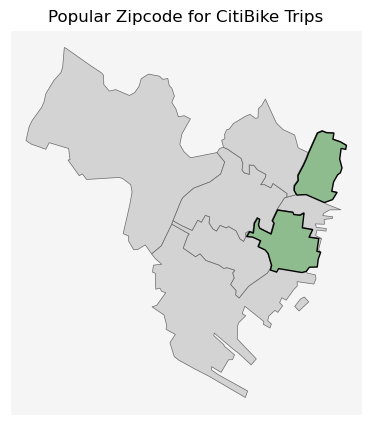

In [27]:
# maps depicting most frequent trip paths between zipcodes

fig,ax = plt.subplots(figsize=(10, 5))

#fig.suptitle('Trips with source and Destination within Same Zipcode', fontsize=12)

new_map.plot(ax=ax, color='lightgrey', edgecolor = 'dimgray')
new_map.loc[new_map['zipcode'] == '07030'].plot(ax=ax, facecolor='darkseagreen', linewidth=1,edgecolor='black')
new_map.loc[new_map['zipcode'] == '07302'].plot(ax=ax, facecolor='darkseagreen', linewidth=1,edgecolor='black')


ax.set_title(label = 'Popular Zipcode for CitiBike Trips',loc='center', fontsize = 12)

ax.set_facecolor("whitesmoke")
ax.set_xticks([])
ax.set_yticks([])